In [14]:
import tensorflow as tf

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [4]:
%cd /content/drive/MyDrive/Kaggle/


/content/drive/MyDrive/Kaggle


In [5]:
%ls /content/drive/MyDrive/Kaggle/


Data/  gtzan-dataset-music-genre-classification.zip  kaggle.json  saved_model/


In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:07<00:00, 170MB/s]
100% 1.21G/1.21G [00:07<00:00, 167MB/s]


In [ ]:
%ls /content/drive/MyDrive/Kaggle/


Data/  gtzan-dataset-music-genre-classification.zip  kaggle.json  saved_model/


In [ ]:
!unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [6]:
%ls /content/drive/MyDrive/Kaggle/


Data/  gtzan-dataset-music-genre-classification.zip  kaggle.json  saved_model/


In [7]:
%cd /content/drive/MyDrive/Kaggle/Data/

/content/drive/MyDrive/Kaggle/Data


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Kaggle/Data/images_original",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 300),
  batch_size=120)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Kaggle/Data/images_original",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300, 300),
  batch_size=120)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
7/7 [==============================] - 157s 5s/step - loss: 2.4650 - accuracy: 0.1437 - val_loss: 2.2776 - val_accuracy: 0.2010
Epoch 2/30
7/7 [==============================] - 5s 397ms/step - loss: 2.1976 - accuracy: 0.2362 - val_loss: 2.1577 - val_accuracy: 0.1859
Epoch 3/30
7/7 [==============================] - 5s 393ms/step - loss: 1.9967 - accuracy: 0.2750 - val_loss: 1.9758 - val_accuracy: 0.3116
Epoch 4/30
7/7 [==============================] - 5s 393ms/step - loss: 1.8320 - accuracy: 0.3500 - val_loss: 1.8107 - val_accuracy: 0.3668
Epoch 5/30
7/7 [==============================] - 5s 394ms/step - loss: 1.6002 - accuracy: 0.4625 - val_loss: 1.7852 - val_accuracy: 0.3266
Epoch 6/30
7/7 [==============================] - 5s 395ms/step - loss: 1.4040 - accuracy: 0.4900 - val_loss: 1.6677 - val_accuracy: 0.3417
Epoch 7/30
7/7 [==============================] - 5s 397ms/step - loss: 1.2930 - accuracy: 0.5325 - val_loss: 1.5576 - val_accuracy: 0.4472
Epoch 8/30
7/7 [=====

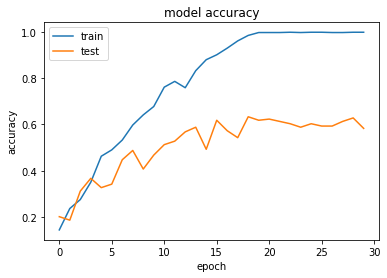

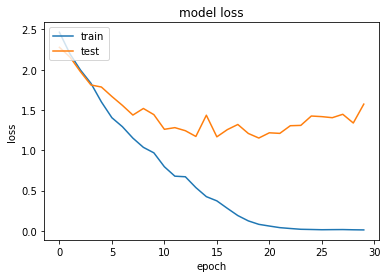

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/saved_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Kaggle/saved_model/assets


In [5]:
saved_model = load_model('/content/drive/MyDrive/Kaggle/saved_model')

In [8]:
os.listdir()

['.config', 'drive', 'sample_data']

In [24]:
im = Image.open("/content/drive/MyDrive/Kaggle/Data/images_original/rock/rock00034.png")
im = im.convert('RGB')
newsize = (300, 300)
im1 = im.resize(newsize)

im2arr = np.array(im1) 
im2arr = im2arr.reshape(1, 300, 300, 3)
print(im2arr.shape)

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
prediction = saved_model.predict(im2arr)
lables_ind = np.argmax(prediction[0])
predicted_label = labels[lables_ind]
print(predicted_label)

(1, 300, 300, 3)
rock


In [25]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>